In [110]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra
import radical.entk as re 

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob
from math import sqrt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator

In [111]:
df = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution'])
df_err = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution'])

trials = 4

rp_data = []
entk_data = []
exec_data = []

list_exec = []
list_rp = []
list_entk = []
list_staging = []

In [112]:
folder = glob.glob('/Users/JumanaDakka/git/hyperspace-radical-collab/experiments/summit/results_0/re.session.login5.jdakka.017990.0005')

rp_session = ra.Session(stype='radical.pilot', src=folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)
rp_units = rp_session.filter(etype='unit', inplace=False)

rp_dur = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])


re_session = ra.Session(src = os.path.dirname(folder[0]), sid = 're.session.login5.jdakka.017990.0005', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])

entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_units = rp_session.filter(etype='unit', inplace=False)
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])

list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur 
list_rp.append(rp_dur)
list_entk.append(entk_dur)
list_staging.append(staging_dur)

list_rp_total = sum(list_rp)/len(list_rp)
list_exec_total = sum(list_exec)/len(list_exec)
list_entk_total = sum(list_entk)/len(list_entk)
# list_staging = sum(list_staging)/len(list_staging)

df.at[1, 'RP overhead'] = list_rp_total
df.at[1, 'EnTK overhead'] = list_entk_total
df.at[1, 'Task Execution'] = list_exec_total
# df.at[1, 'Pre Exec Overhead'] = list_exec


df_err.at[1, 'RP overhead'] = np.std(list_rp)/sqrt(2)
df_err.at[1,'EnTK overhead'] = np.std(list_entk)/sqrt(2)
df_err.at[1, 'Task Execution'] = np.std(list_exec)/sqrt(2)

df

,RP overhead,EnTK overhead,Task Execution
1,77.6598,1.1565,5884.42


In [113]:
folder = glob.glob('/Users/JumanaDakka/git/hyperspace-radical-collab/experiments/summit/results_3/re.session.login5.jdakka.017991.0001')

rp_session = ra.Session(stype='radical.pilot', src=folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)
rp_units = rp_session.filter(etype='unit', inplace=False)

rp_dur = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])


re_session = ra.Session(src = os.path.dirname(folder[0]), sid = 're.session.login5.jdakka.017991.0001', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])

entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_units = rp_session.filter(etype='unit', inplace=False)
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])

list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur 
list_rp.append(rp_dur)
list_entk.append(entk_dur)
list_exec.append(exec_dur)
list_staging.append(staging_dur)

list_rp_total = sum(list_rp)/len(list_rp)
list_exec_total = sum(list_exec)/len(list_exec)
list_entk_total = sum(list_entk)/len(list_entk)
# list_staging = sum(list_staging)/len(list_staging)

df.at[1, 'RP overhead'] = list_rp_total
df.at[1, 'EnTK overhead'] = list_entk_total
df.at[1, 'Task Execution'] = list_exec_total
# df.at[1, 'Pre Exec Overhead'] = list_exec


df_err.at[1, 'RP overhead'] = np.std(list_rp)/sqrt(2)
df_err.at[1,'EnTK overhead'] = np.std(list_entk)/sqrt(2)
df_err.at[1, 'Task Execution'] = np.std(list_exec)/sqrt(2)

df


,RP overhead,EnTK overhead,Task Execution
1,68.9472,1.2372,5836.6


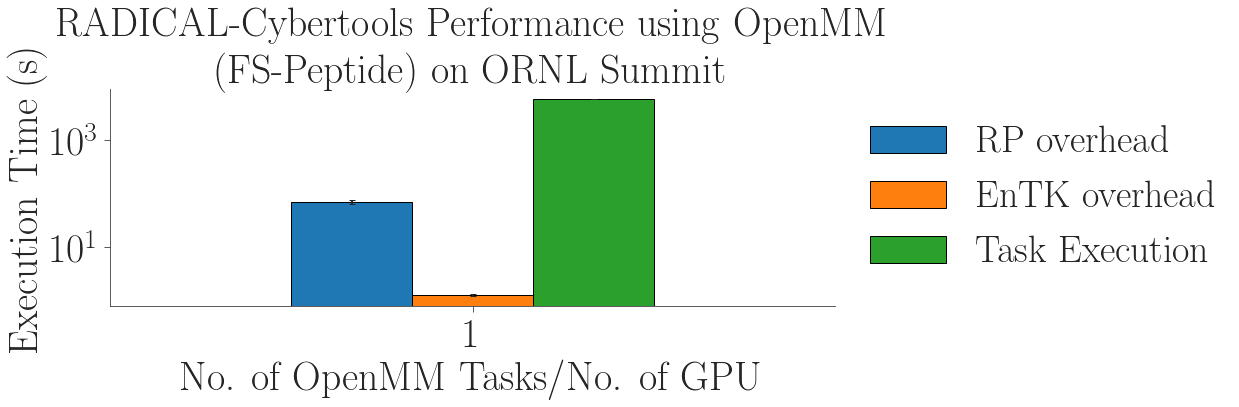

In [114]:
fig, ax = fig_setup(figsize=(13,4))
FONTSIZE = 20 
width=0.5
ax = df.plot(kind='bar',
             ax = ax,
             width = width,
             yerr = df_err,
             logy = True,
             rot=0,
             )

plt.xticks(np.arange(1), ('1/1'))
ax.set_title('RADICAL-Cybertools Performance using OpenMM \n (FS-Peptide) on ORNL Summit')
ax.set_xlabel('No. of OpenMM Tasks/No. of GPU')
ax.set_ylabel('Execution Time (s)')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('figures/single_openmm.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/single_openmm.png', dpi=300, bbox_inches='tight')